In [1]:
import numpy as np
import quail
from quail import Fingerprint, OptimalPresenter
import seaborn as sns
from scipy.spatial.distance import cdist

In [2]:
# generate some fake data
next_presented = ['CAT', 'DOG', 'HORSE', 'SNAIL', 'SHOE', 'FOOT', 'ARM', 'UTAH', 'NEW YORK', 'TRUCK', 'EAR', 'ARIZONA', 'BIKE', 'CAB', 'CAR', 'TOE']
# perm = np.random.permutation(len(next_presented))
# next_recalled = [next_presented[i] for i in perm]
next_recalled = next_presented

next_features = [{
                    'category' : 'animal',
                    'size' : 'bigger',
                    'starting letter' : 'C',
                    'length' : 3
                 },
                 {
                    'category' : 'animal',
                    'size' : 'bigger',
                    'starting letter' : 'D',
                    'length' : 3
                 },
                 {
                    'category' : 'animal',
                    'size' : 'bigger',
                    'starting letter' : 'H',
                    'length' : 5
                 },
                 {
                    'category' : 'animal',
                    'size' : 'bigger',
                    'starting letter' : 'S',
                    'length' : 5
                 },
                 {
                    'category' : 'body part',
                    'size' : 'smaller',
                    'starting letter' : 'S',
                    'length' : 4
                 },
                 {
                    'category' : 'body part',
                    'size' : 'smaller',
                    'starting letter' : 'F',
                    'length' : 4
                 },
                 {
                    'category' : 'body part',
                    'size' : 'bigger',
                    'starting letter' : 'A',
                    'length' : 3
                 },
                 {
                    'category' : 'state',
                    'size' : 'bigger',
                    'starting letter' : 'U',
                    'length' : 4
                 },
                 {
                    'category' : 'state',
                    'size' : 'bigger',
                    'starting letter' : 'N',
                    'length' : 7
                 },
                 {
                    'category' : 'transportation',
                    'size' : 'bigger',
                    'starting letter' : 'T',
                    'length' : 5
                 },
                 {
                    'category' : 'body part',
                    'size' : 'smaller',
                    'starting letter' : 'E',
                    'length' : 3
                 },
                 {
                    'category' : 'state',
                    'size' : 'bigger',
                    'starting letter' : 'A',
                    'length' : 7
                 },
                 {
                    'category' : 'transportation',
                    'size' : 'bigger',
                    'starting letter' : 'B',
                    'length' : 4
                 },
                 {
                    'category' : 'transportation',
                    'size' : 'bigger',
                    'starting letter' : 'C',
                    'length' : 3
                 },
                 {
                    'category' : 'transportation',
                    'size' : 'bigger',
                    'starting letter' : 'C',
                    'length' : 3
                 },
                 {
                    'category' : 'body part',
                    'size' : 'smaller',
                    'starting letter' : 'T',
                    'length' : 3
                 }
]
dist_funcs = {
                'category' : lambda a, b: int(a!=b),
                'size' : lambda a, b: int(a!=b),
                'starting letter' : lambda a, b: int(a!=b),
                'length' : lambda a, b: np.linalg.norm(np.subtract(a,b))
}

egg = quail.Egg(pres=[next_presented], rec=[next_recalled], features=[next_features])

In [3]:
# initialize fingerprint
fingerprint = Fingerprint(init=egg)

# initialize presenter
params = {
    'fingerprint' : fingerprint
}
presenter = OptimalPresenter(params=params, strategy='stabilize')

# update the fingerprint
fingerprint.update(egg)

weights = fingerprint.state.reshape(1,4)

In [5]:
nperms=100
dist_stick = []
dist_beststick = []
dist_perm = []
dist_permde = []
dist_rand = []
dist_bestchoice = []
    
for iperm in range(nperms):
    
    presenter.strategy = 'stabilize'
    
#     # random
    shuffled_egg = presenter.order(egg, strategy='random')
    weights_rand = quail.analyze(shuffled_egg, analysis='fingerprint')
    dist_rand.append(cdist(weights_rand, weights)[0])
    
    # reorder next list using stick breaking
    resorted_egg = presenter.order(shuffled_egg, method='stick')
    weights_stick = quail.analyze(resorted_egg, analysis='fingerprint')
    dist_stick.append(cdist(weights_stick, weights)[0])

    # reorder next list using stick breaking
    resorted_egg = presenter.order(shuffled_egg, method='best_stick', nperms=10000)
    weights_stick = quail.analyze(resorted_egg, analysis='fingerprint')
    dist_beststick.append(cdist(weights_stick, weights)[0])
    
    # reorder next list using permutation
    resorted_egg = presenter.order(shuffled_egg, method='permute', nperms=10000)
    weights_perm = quail.analyze(resorted_egg, analysis='fingerprint')
    dist_perm.append(cdist(weights_perm, weights))
    
    presenter.strategy = 'destabilize'
    
    # reorder next list using permutation
    resorted_egg = presenter.order(shuffled_egg, method='permute', nperms=10000)
    weights_permde = quail.analyze(resorted_egg, analysis='fingerprint')
    dist_permde.append(cdist(weights_permde, weights))
    
    # reorder next list using permutation
#     resorted_egg = presenter.order(shuffled_egg, method='best_choice', nperms=100)
#     weights_choice = quail.analyze(resorted_egg, analysis='fingerprint')
#     dist_bestchoice.append(cdist(weights_choice, weights)[0])
    
    if iperm % 10 == 0:
        print(iperm)

0
10
20
30


KeyboardInterrupt: 

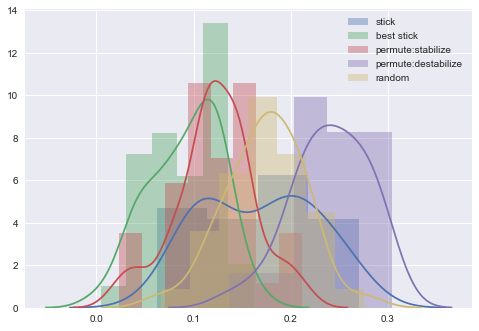

In [6]:
sns.distplot(dist_stick, label='stick')
sns.distplot(dist_beststick, label='best stick')
# sns.distplot(dist_bestchoice, label='best choice')
sns.distplot(dist_perm, label='permute:stabilize')
sns.distplot(dist_permde, label='permute:destabilize')
sns.distplot(dist_rand, label='random')
sns.plt.legend()
sns.plt.show()

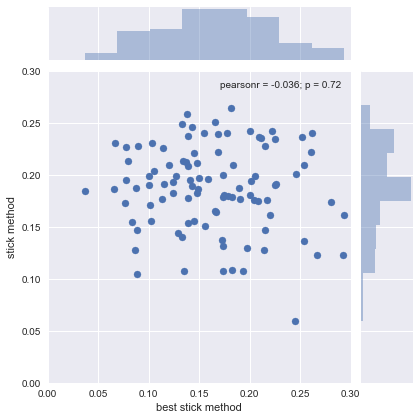

In [16]:
import pandas as pd
df = pd.DataFrame(np.array([np.squeeze(dist_rand),
                            np.squeeze(dist_perm),
                            np.squeeze(dist_stick),
                            np.squeeze(dist_beststick),
                            np.squeeze(dist_bestchoice)]).T, 
                  columns=['random', 'permutation', 'stick', 'best stick', 'best choice'])
sns.jointplot(df['best stick method'], df['stick method'], xlim=[0, .3], ylim=[0, .3])

sns.plt.show()

In [15]:
presenter.get_params('fingerprint').state = np.array([.5, .5, .5, .95])
for i in range(10):
    reordered_egg = presenter.order(egg, method='stick')
    quail.analyze(reordered_egg, analysis='fingerprint')
    
pd.concat([quail.analyze(presenter.order(egg, method='stick'), analysis='fingerprint') for i in range(10)])

category    length  starting letter      size
Subject List                                               
0       0     0.515274  0.519878         0.515055  0.657237
        0     0.455842  0.505745         0.512526  0.657344
        0     0.576467  0.544756         0.479272  0.657032
        0     0.543654  0.509937         0.516217  0.719010
        0     0.492840  0.513554         0.546930  0.659156
        0     0.515143  0.444503         0.483904  0.719010
        0     0.575817  0.440890         0.482739  0.719010
        0     0.484804  0.592719         0.482049  0.531834
        0     0.648167  0.509546         0.482994  0.719010
        0     0.575038  0.588900         0.505273  0.657032

In [10]:
%%timeit
presenter.order(shuffled_egg, method='permute', nperms=2500)

1 loop, best of 3: 15.3 s per loop


In [13]:
import pandas as pd

df = pd.DataFrame(np.array([[1, 2, 3, 4, 5], [1, 2, 3, 4, 5]]).T)

In [35]:
ncats = 4

# load wordpool
wp = pd.read_csv('/Users/andyheusser/Documents/github/quail/quail/data/cut_wordpool.csv')


wp = wp[wp['GROUP']==np.random.choice(range(16), 1)[0]].sample(16)

# first letter
wp['FIRST LETTER'] = wp['WORD'].apply(lambda x: x[0])

# word length
wp['WORD LENGTH'] = wp['WORD'].apply(lambda x: len(x))

# color
wp['COLOR'] = [[int(np.random.rand() * 255) for i in range(3)] for i in range(16)]

wp

,WORD,SIZE,CATEGORY,GROUP,FIRST LETTER,WORD LENGTH,COLOR
145,FORK,small,KITCHEN-RELATED,10,F,4,"[246, 166, 78]"
151,GIRDLE,small,CLOTHING,10,G,6,"[79, 80, 185]"
155,SUNFLOWER,small,FLOWERS,10,S,9,"[112, 228, 103]"
147,TOASTER,large,KITCHEN-RELATED,10,T,7,"[57, 222, 141]"
149,DRESS,small,CLOTHING,10,D,5,"[160, 209, 57]"
144,KNIFE,small,KITCHEN-RELATED,10,K,5,"[157, 177, 204]"
157,MONTANA,large,STATES,10,M,7,"[146, 66, 41]"
156,MAINE,large,STATES,10,M,5,"[157, 34, 75]"
154,NARCISSUS,small,FLOWERS,10,N,9,"[76, 172, 99]"
146,SKILLET,large,KITCHEN-RELATED,10,S,7,"[245, 83, 34]"
